In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Pretendard"
plt.rcParams["font.size"] = 10
import seaborn as sns
from plotnine import *
import missingno as msno

소상공인시장진흥공단_상가(상권)정보 중에서 서울과 부산 데이터만 읽어서 하나의 데이터프레임으로 만든다.

In [3]:
shop_2022_seoul = pd.read_csv('./data/shop_2022_seoul.csv')
shop_2022_seoul.head()

상가업소번호         상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드   상권업종중분류명  \
0  23324279       제중건강원  NaN         D       소매       D10    건강/미용식품   
1  24525909       민속악기사  NaN         D       소매       D04  취미/오락관련소매   
2  24715368       태평양진주  NaN         D       소매       D26   시계/귀금속소매   
3  15554136  김선희꼼꼼국어교습소  NaN         R    학문/교육       R01  학원-보습교습입시   
4  17174175         비지트  NaN         Q       음식       Q01         한식   

  상권업종소분류코드   상권업종소분류명 표준산업분류코드  ...                     건물관리번호     건물명  \
0    D10A07        건강원   G47216  ...  1156010600100410002034626     NaN   
1    D04A09       악기판매   G47593  ...  1120012200101420011000227     NaN   
2    D26A01     시계/귀금속   G47830  ...  1111015200100440000000001  금사랑투빌딩   
3    R01A01      학원-입시   P85501  ...  1171011100101970003017195     NaN   
4    Q01A01  한식/백반/한정식   I56111  ...  1165010100108540018009586   상랑의빌딩   

                               도로명주소   구우편번호 신우편번호  동정보  층정보  호정보          경도  \
0  서울특별시 영등포구 영중로14길 11-17, (영등포동5가)  150030  7250  NaN    1  NaN  126.907168   
1            서울특별시 성동구 용답5길 2, (용답동)  133849  4803  NaN  NaN  NaN  127.049018   
2        서울특별시 종로구 서순라길 17-10, (봉익동)  110390  3138  NaN  NaN  NaN  126.993530   
3       서울특별시 송파구 위례성대로12길 31, (방이동)  138834  5640  NaN    2  NaN  127.121520   
4         서울특별시 서초구 동광로18길 82, (방배동)  137837  6572  NaN    1  NaN  126.991394   

          위도  
0  37.520613  
1  37.566857  
2  37.571848  
3  37.510967  
4  37.488375  

[5 rows x 39 columns]

In [4]:
shop_2022_busan = pd.read_csv('./data/shop_2022_busan.csv')
shop_2022_busan.tail()

상가업소번호    상호명   지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
157725  18759679  꾸미다뷰티   NaN         F    생활서비스       F01   이/미용/건강   
157726  18759675     본가  꽃게아구         Q       음식       Q01        한식   
157727  18764252   블루워시   하단점         F    생활서비스       F02  세탁/가사서비스   
157728  18743127    몰운대   NaN         D       소매       D03     종합소매점   
157729  18744797     루스   NaN         D       소매       D16     화장품소매   

       상권업종소분류코드   상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
157725    F01A02     발/네일케어   S96119  ...  2626010600100400013001989   
157726    Q01A01  한식/백반/한정식   I56111  ...  2623011000100560002048159   
157727    F02A01    세탁소/빨래방   S96912  ...  2638010300108870007035678   
157728    D03A05     수입품판매점   G47190  ...  2638010600116240000000001   
157729    D16A01     화장품판매점   G47813  ...  2635010100108770000000001   

                  건물명                              도로명주소   구우편번호  신우편번호  동정보  \
157725            NaN         부산광역시 동래구 수안로8번길 35, (수안동)  607823  47887    E   
157726          한신센타뷰  부산광역시 부산진구 가야대로 597, (가야동, 한신센타뷰)  614800  47272  NaN   
157727           헤를리치   부산광역시 사하구 하신번영로 302, (하단동, 헤를리치)  604853  49306  NaN   
157728  다대동롯데캐슬몰운대아파트        부산광역시 사하구 다대낙조2길 100, (다대동)  604783  49497  104   
157729            NaN         부산광역시 해운대구 신반송로 178, (반송동)  612808  48011  NaN   

        층정보  호정보          경도         위도  
157725    1  NaN  129.089537  35.195231  
157726    2  NaN  129.036980  35.155247  
157727  NaN  NaN  128.959048  35.108007  
157728  NaN  NaN  128.965427  35.056377  
157729    3  NaN  129.160517  35.229194  

[5 rows x 39 columns]

In [5]:
shop_2022 = pd.concat([shop_2022_seoul, shop_2022_busan], ignore_index=True)
shop_2022

상가업소번호         상호명   지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드   상권업종중분류명  \
0       23324279       제중건강원   NaN         D       소매       D10    건강/미용식품   
1       24525909       민속악기사   NaN         D       소매       D04  취미/오락관련소매   
2       24715368       태평양진주   NaN         D       소매       D26   시계/귀금속소매   
3       15554136  김선희꼼꼼국어교습소   NaN         R    학문/교육       R01  학원-보습교습입시   
4       17174175         비지트   NaN         Q       음식       Q01         한식   
...          ...         ...   ...       ...      ...       ...        ...   
519215  18759679       꾸미다뷰티   NaN         F    생활서비스       F01    이/미용/건강   
519216  18759675          본가  꽃게아구         Q       음식       Q01         한식   
519217  18764252        블루워시   하단점         F    생활서비스       F02   세탁/가사서비스   
519218  18743127         몰운대   NaN         D       소매       D03      종합소매점   
519219  18744797          루스   NaN         D       소매       D16      화장품소매   

       상권업종소분류코드   상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
0         D10A07        건강원   G47216  ...  1156010600100410002034626   
1         D04A09       악기판매   G47593  ...  1120012200101420011000227   
2         D26A01     시계/귀금속   G47830  ...  1111015200100440000000001   
3         R01A01      학원-입시   P85501  ...  1171011100101970003017195   
4         Q01A01  한식/백반/한정식   I56111  ...  1165010100108540018009586   
...          ...        ...      ...  ...                        ...   
519215    F01A02     발/네일케어   S96119  ...  2626010600100400013001989   
519216    Q01A01  한식/백반/한정식   I56111  ...  2623011000100560002048159   
519217    F02A01    세탁소/빨래방   S96912  ...  2638010300108870007035678   
519218    D03A05     수입품판매점   G47190  ...  2638010600116240000000001   
519219    D16A01     화장품판매점   G47813  ...  2635010100108770000000001   

                  건물명                              도로명주소   구우편번호  신우편번호  동정보  \
0                 NaN  서울특별시 영등포구 영중로14길 11-17, (영등포동5가)  150030   7250  NaN   
1                 NaN            서울특별시 성동구 용답5길 2, (용답동)  133849   4803  NaN   
2              금사랑투빌딩        서울특별시 종로구 서순라길 17-10, (봉익동)  110390   3138  NaN   
3                 NaN       서울특별시 송파구 위례성대로12길 31, (방이동)  138834   5640  NaN   
4               상랑의빌딩         서울특별시 서초구 동광로18길 82, (방배동)  137837   6572  NaN   
...               ...                                ...     ...    ...  ...   
519215            NaN         부산광역시 동래구 수안로8번길 35, (수안동)  607823  47887    E   
519216          한신센타뷰  부산광역시 부산진구 가야대로 597, (가야동, 한신센타뷰)  614800  47272  NaN   
519217           헤를리치   부산광역시 사하구 하신번영로 302, (하단동, 헤를리치)  604853  49306  NaN   
519218  다대동롯데캐슬몰운대아파트        부산광역시 사하구 다대낙조2길 100, (다대동)  604783  49497  104   
519219            NaN         부산광역시 해운대구 신반송로 178, (반송동)  612808  48011  NaN   

        층정보  호정보          경도         위도  
0         1  NaN  126.907168  37.520613  
1       NaN  NaN  127.049018  37.566857  
2       NaN  NaN  126.993530  37.571848  
3         2  NaN  127.121520  37.510967  
4         1  NaN  126.991394  37.488375  
...     ...  ...         ...        ...  
519215    1  NaN  129.089537  35.195231  
519216    2  NaN  129.036980  35.155247  
519217  NaN  NaN  128.959048  35.108007  
519218  NaN  NaN  128.965427  35.056377  
519219    3  NaN  129.160517  35.229194  

[519220 rows x 39 columns]

In [6]:
# 서울과 부산 데이터만 읽어서 하나의 데이터프레임으로 만든 데이터를 csv 파일로 저장한다.
# csv 파일로 저장할 때 인덱스를 제외하고 저장하려면 index=None 옵션을 사용한다.
shop_2022.to_csv('./data/shop_2022.csv', index=None)

In [7]:
# 파이썬은 계속 메모리를 차지하는 문제가 발생하므로 del 명령을 실행해서 사용하지 않는 변수는 메모리에서 삭제한다.
del shop_2022_seoul, shop_2022_busan

In [8]:
shop_2022 = pd.read_csv('./data/shop_2022.csv')
shop_2022.head()

상가업소번호         상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드   상권업종중분류명  \
0  23324279       제중건강원  NaN         D       소매       D10    건강/미용식품   
1  24525909       민속악기사  NaN         D       소매       D04  취미/오락관련소매   
2  24715368       태평양진주  NaN         D       소매       D26   시계/귀금속소매   
3  15554136  김선희꼼꼼국어교습소  NaN         R    학문/교육       R01  학원-보습교습입시   
4  17174175         비지트  NaN         Q       음식       Q01         한식   

  상권업종소분류코드   상권업종소분류명 표준산업분류코드  ...                     건물관리번호     건물명  \
0    D10A07        건강원   G47216  ...  1156010600100410002034626     NaN   
1    D04A09       악기판매   G47593  ...  1120012200101420011000227     NaN   
2    D26A01     시계/귀금속   G47830  ...  1111015200100440000000001  금사랑투빌딩   
3    R01A01      학원-입시   P85501  ...  1171011100101970003017195     NaN   
4    Q01A01  한식/백반/한정식   I56111  ...  1165010100108540018009586   상랑의빌딩   

                               도로명주소   구우편번호 신우편번호  동정보  층정보  호정보          경도  \
0  서울특별시 영등포구 영중로14길 11-17, (영등포동5가)  150030  7250  NaN    1  NaN  126.907168   
1            서울특별시 성동구 용답5길 2, (용답동)  133849  4803  NaN  NaN  NaN  127.049018   
2        서울특별시 종로구 서순라길 17-10, (봉익동)  110390  3138  NaN  NaN  NaN  126.993530   
3       서울특별시 송파구 위례성대로12길 31, (방이동)  138834  5640  NaN    2  NaN  127.121520   
4         서울특별시 서초구 동광로18길 82, (방배동)  137837  6572  NaN    1  NaN  126.991394   

          위도  
0  37.520613  
1  37.566857  
2  37.571848  
3  37.510967  
4  37.488375  

[5 rows x 39 columns]

분석 작업에 필요한 컬럼을 삭제한다.

In [9]:
shop_2022.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [10]:
shop_2022.drop('층정보', axis=1, inplace=True)

In [11]:
# drop() 함수로 불필요한 컬럼을 삭제한다. => 원본 데이터가 손상된다.
# drop() 함수는 axis=0이 기본값이므로 axis를 생략하면 행 방향 데이터를 제거하려 하기 때문에 에러가 발생되므로 axis=1 옵션을 지정해서 컬럼을 삭제한다.
# 1개의 컬럼을 삭제하려면 삭제할 컬럼의 이름만 쓰면 되지만 2개 이상의 컬럼을 제거하려면 삭제할 컬럼을 리스트로 묶어서 넘긴다.
shop_2022.drop(['동정보', '호정보'], axis=1, inplace=True)

In [12]:
shop_2022.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '경도', '위도'],
      dtype='object')

분석 작업에 필요한 컬럼을 추려낸다.

In [13]:
shop_2022.isnull().sum()


상가업소번호            0
상호명               1
지점명          434229
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      35861
표준산업분류명       35861
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         99869
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        448004
건물관리번호            0
건물명          273448
도로명주소             0
구우편번호             0
신우편번호             0
경도                0
위도                0
dtype: int64

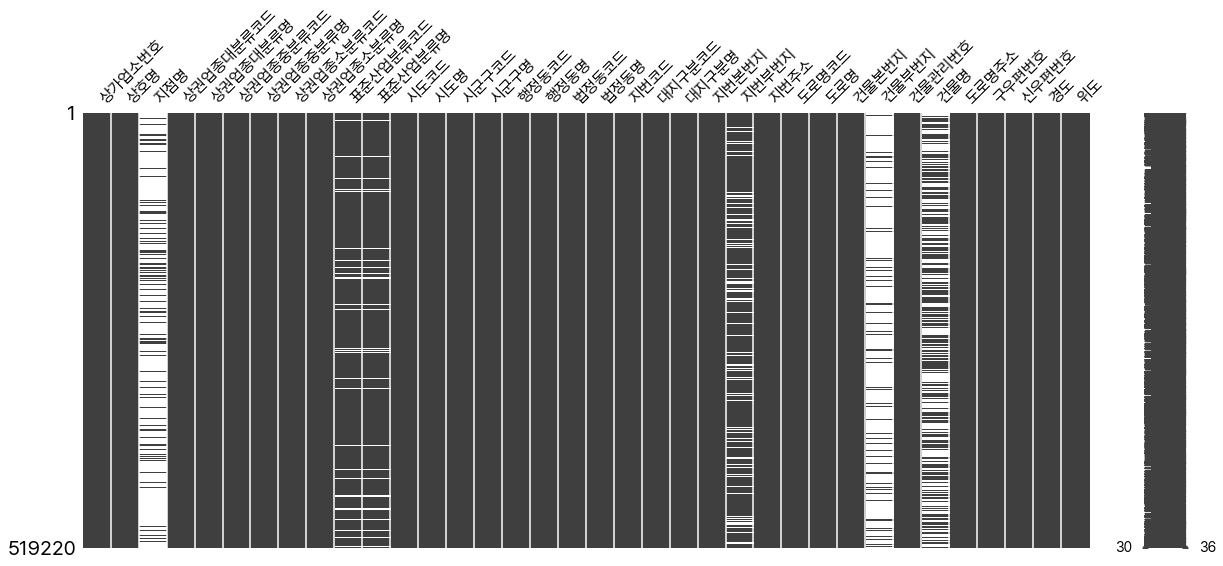

In [14]:
msno.matrix(shop_2022, figsize=(20, 8))
plt.show()

In [15]:
view_columns = ['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '시도명', '시군구명', '행정동명', '법정동명', '지번주소', '도로명주소', '경도', '위도']
shop_2022_09 = shop_2022[view_columns]
del shop_2022

In [16]:
shop_2022_09

상호명   지점명 상권업종대분류명   상권업종중분류명    시도명  시군구명         행정동명  \
0            제중건강원   NaN       소매    건강/미용식품  서울특별시  영등포구         영등포동   
1            민속악기사   NaN       소매  취미/오락관련소매  서울특별시   성동구          용답동   
2            태평양진주   NaN       소매   시계/귀금속소매  서울특별시   종로구  종로1.2.3.4가동   
3       김선희꼼꼼국어교습소   NaN    학문/교육  학원-보습교습입시  서울특별시   송파구         방이1동   
4              비지트   NaN       음식         한식  서울특별시   서초구         방배4동   
...            ...   ...      ...        ...    ...   ...          ...   
519215       꾸미다뷰티   NaN    생활서비스    이/미용/건강  부산광역시   동래구          수민동   
519216          본가  꽃게아구       음식         한식  부산광역시  부산진구         가야1동   
519217        블루워시   하단점    생활서비스   세탁/가사서비스  부산광역시   사하구         하단2동   
519218         몰운대   NaN       소매      종합소매점  부산광역시   사하구         다대1동   
519219          루스   NaN       소매      화장품소매  부산광역시  해운대구         반송2동   

          법정동명                    지번주소                              도로명주소  \
0       영등포동5가  서울특별시 영등포구 영등포동5가 41-1  서울특별시 영등포구 영중로14길 11-17, (영등포동5가)   
1          용답동    서울특별시 성동구 용답동 142-11            서울특별시 성동구 용답5길 2, (용답동)   
2          봉익동      서울특별시 종로구 봉익동 43-1        서울특별시 종로구 서순라길 17-10, (봉익동)   
3          방이동     서울특별시 송파구 방이동 197-3       서울특별시 송파구 위례성대로12길 31, (방이동)   
4          방배동    서울특별시 서초구 방배동 854-18         서울특별시 서초구 동광로18길 82, (방배동)   
...        ...                     ...                                ...   
519215     수안동     부산광역시 동래구 수안동 40-13         부산광역시 동래구 수안로8번길 35, (수안동)   
519216     가야동     부산광역시 부산진구 가야동 56-2  부산광역시 부산진구 가야대로 597, (가야동, 한신센타뷰)   
519217     하단동     부산광역시 사하구 하단동 887-7   부산광역시 사하구 하신번영로 302, (하단동, 헤를리치)   
519218     다대동      부산광역시 사하구 다대동 1624        부산광역시 사하구 다대낙조2길 100, (다대동)   
519219     반송동      부산광역시 해운대구 반송동 877         부산광역시 해운대구 신반송로 178, (반송동)   

                경도         위도  
0       126.907168  37.520613  
1       127.049018  37.566857  
2       126.993530  37.571848  
3       127.121520  37.510967  
4       126.991394  37.488375  
...            ...        ...  
519215  129.089537  35.195231  
519216  129.036980  35.155247  
519217  128.959048  35.108007  
519218  128.965427  35.056377  
519219  129.160517  35.229194  

[519220 rows x 12 columns]

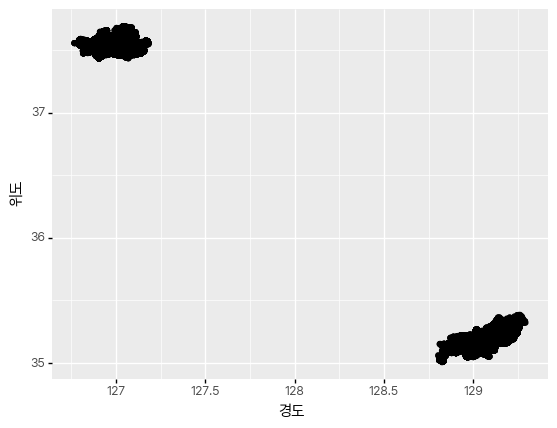

<ggplot: (-9223371836155866480)>

In [17]:
(
    ggplot(shop_2022_09, aes(x='경도', y='위도'))
        + geom_point()
        + theme(text=element_text(family='Pretendard'))
)

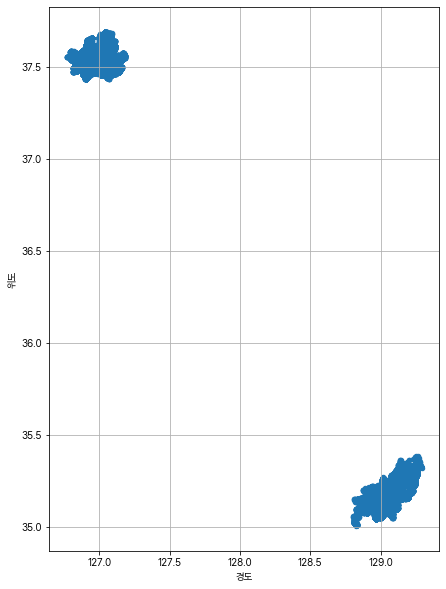

In [18]:
shop_2022_09.plot.scatter(x='경도', y='위도', grid=True, figsize=(7, 10))
plt.show()

In [19]:
shop_2022_09[shop_2022_09['시도명'] == '서울특별시']
# pandas에서 불린 인덱싱시 and 조건은 '&'를 사용하고 or 조건은 '|'를 사용한다.
# and, or 조건 지정시 관계 연산자가 사용된 부분은 반드시 ()로 묶어야 한다.
shop_2022_09[(shop_2022_09['시도명'] == '서울특별시') | (shop_2022_09['시도명'] == '서울') | (shop_2022_09['시도명'] == '서울시')]

# 시도명열 또는 지번주소열 또는 도로명주소열의 입력값을 앞 2글자가 서울인 데이터를 얻어온다.
# shop_2022_09.시도명.str[:2]
# shop_2022_09[shop_2022_09.지번주소.str[:2] == '서울']
# shop_2022_09[shop_2022_09.도로명주소.str.find('서울') >= 0]
# shop_2022_09[shop_2022_09.도로명주소.str.count('서울') >= 1]

# 시도명열 또는 지번주소열 또는 도로명주소열의 입력값이 서울로 시작하는 데이터를 얻어온다.
# startswith() 함수는 인수로 지정된 문자열로 시작하면 True, 그렇지 않으면 False를 리턴한다.
# endswith() 함수는 인수로 지정된 문자열로 끝나면 True, 그렇지 않으면 False를 리턴한다.
shop_seoul = shop_2022_09[shop_2022_09.시도명.str.startswith('서울')]

In [20]:
# '~'는 ~가 아닌 것을 의미한다.
shop_except_seoul = shop_2022_09[~shop_2022_09.시도명.str.startswith('서울')]
shop_except_seoul

상호명   지점명 상권업종대분류명   상권업종중분류명    시도명  시군구명  행정동명   법정동명  \
361490    미광장   NaN       숙박  모텔/여관/여인숙  부산광역시    중구   부평동  부평동4가   
361491  BHC치킨   동래점       음식     닭/오리요리  부산광역시   동래구   복산동    복천동   
361492    스텔라   NaN       소매       의복의류  부산광역시   수영구  남천2동    남천동   
361493   도란도란   NaN       음식         한식  부산광역시  부산진구  개금1동    개금동   
361494  럭키사진관   NaN    생활서비스         사진  부산광역시   사하구   당리동    당리동   
...       ...   ...      ...        ...    ...   ...   ...    ...   
519215  꾸미다뷰티   NaN    생활서비스    이/미용/건강  부산광역시   동래구   수민동    수안동   
519216     본가  꽃게아구       음식         한식  부산광역시  부산진구  가야1동    가야동   
519217   블루워시   하단점    생활서비스   세탁/가사서비스  부산광역시   사하구  하단2동    하단동   
519218    몰운대   NaN       소매      종합소매점  부산광역시   사하구  다대1동    다대동   
519219     루스   NaN       소매      화장품소매  부산광역시  해운대구  반송2동    반송동   

                        지번주소                              도로명주소          경도  \
361490   부산광역시 중구 부평동4가 25-1       부산광역시 중구 보수대로44번길 5, (부평동4가)  129.023668   
361491     부산광역시 동래구 복천동 185       부산광역시 동래구 동래로147번길 18, (복천동)  129.087156   
361492   부산광역시 수영구 남천동 148-4   부산광역시 수영구 광안해변로 100, (남천동, 삼익비치)  129.115397   
361493  부산광역시 부산진구 개금동 174-4   부산광역시 부산진구 가야대로482번길 29-3, (개금동)  129.024938   
361494  부산광역시 사하구 당리동 325-30          부산광역시 사하구 낙동대로 395, (당리동)  128.974794   
...                      ...                                ...         ...   
519215   부산광역시 동래구 수안동 40-13         부산광역시 동래구 수안로8번길 35, (수안동)  129.089537   
519216   부산광역시 부산진구 가야동 56-2  부산광역시 부산진구 가야대로 597, (가야동, 한신센타뷰)  129.036980   
519217   부산광역시 사하구 하단동 887-7   부산광역시 사하구 하신번영로 302, (하단동, 헤를리치)  128.959048   
519218    부산광역시 사하구 다대동 1624        부산광역시 사하구 다대낙조2길 100, (다대동)  128.965427   
519219    부산광역시 해운대구 반송동 877         부산광역시 해운대구 신반송로 178, (반송동)  129.160517   

               위도  
361490  35.100979  
361491  35.205267  
361492  35.143770  
361493  35.151645  
361494  35.102905  
...           ...  
519215  35.195231  
519216  35.155247  
519217  35.108007  
519218  35.056377  
519219  35.229194  

[157730 rows x 12 columns]

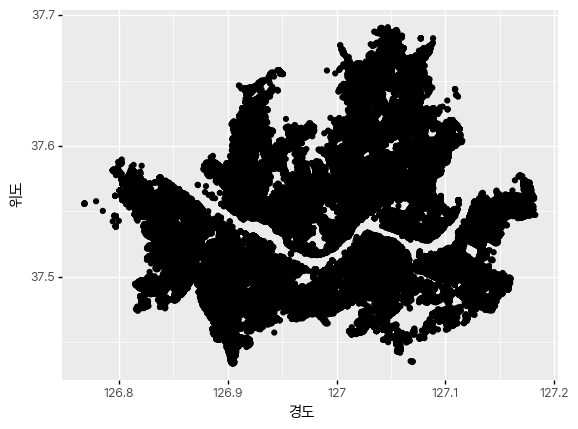

<ggplot: (200698874695)>

In [21]:
# 서울만 시각화한다.
(
    ggplot(shop_seoul, aes(x='경도', y='위도'))
        + geom_point()
        + theme(text=element_text(family='Pretendard'))
)

<AxesSubplot:xlabel='경도', ylabel='위도'>

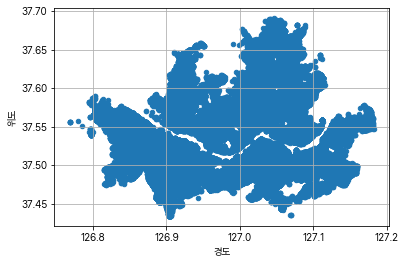

In [22]:
shop_seoul.plot.scatter(x='경도', y='위도', grid=True)

shop_2022_09 데이터프레임의 도로명주소를 활용해서 '시도', '구군' 열을 만든다.

In [23]:
# split() 함수에 expand=True 옵션을 지정해서 공백을 경계로 문자열을 서로 다른 열(데이터프레임)로 구분해서 
print(type(shop_2022_09[:1].도로명주소))
print(type(shop_2022_09[:1].도로명주소.str))
print(type(shop_2022_09[:1].도로명주소.str.split()))
print(type(shop_2022_09[:1].도로명주소.str.split(' ', expand=True)))

shop_2022_09.columns

<class 'pandas.core.series.Series'>
<class 'pandas.core.strings.StringMethods'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Index(['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '시도명', '시군구명', '행정동명', '법정동명',
       '지번주소', '도로명주소', '경도', '위도'],
      dtype='object')

In [24]:
shop_2022_09['시도'] = shop_2022_09['도로명주소'].str.split(' ', expand=True)[0]
shop_2022_09['구군'] = shop_2022_09['도로명주소'].str.split(' ', expand=True)[1]
shop_2022_09

상호명   지점명 상권업종대분류명   상권업종중분류명    시도명  시군구명         행정동명  \
0            제중건강원   NaN       소매    건강/미용식품  서울특별시  영등포구         영등포동   
1            민속악기사   NaN       소매  취미/오락관련소매  서울특별시   성동구          용답동   
2            태평양진주   NaN       소매   시계/귀금속소매  서울특별시   종로구  종로1.2.3.4가동   
3       김선희꼼꼼국어교습소   NaN    학문/교육  학원-보습교습입시  서울특별시   송파구         방이1동   
4              비지트   NaN       음식         한식  서울특별시   서초구         방배4동   
...            ...   ...      ...        ...    ...   ...          ...   
519215       꾸미다뷰티   NaN    생활서비스    이/미용/건강  부산광역시   동래구          수민동   
519216          본가  꽃게아구       음식         한식  부산광역시  부산진구         가야1동   
519217        블루워시   하단점    생활서비스   세탁/가사서비스  부산광역시   사하구         하단2동   
519218         몰운대   NaN       소매      종합소매점  부산광역시   사하구         다대1동   
519219          루스   NaN       소매      화장품소매  부산광역시  해운대구         반송2동   

          법정동명                    지번주소                              도로명주소  \
0       영등포동5가  서울특별시 영등포구 영등포동5가 41-1  서울특별시 영등포구 영중로14길 11-17, (영등포동5가)   
1          용답동    서울특별시 성동구 용답동 142-11            서울특별시 성동구 용답5길 2, (용답동)   
2          봉익동      서울특별시 종로구 봉익동 43-1        서울특별시 종로구 서순라길 17-10, (봉익동)   
3          방이동     서울특별시 송파구 방이동 197-3       서울특별시 송파구 위례성대로12길 31, (방이동)   
4          방배동    서울특별시 서초구 방배동 854-18         서울특별시 서초구 동광로18길 82, (방배동)   
...        ...                     ...                                ...   
519215     수안동     부산광역시 동래구 수안동 40-13         부산광역시 동래구 수안로8번길 35, (수안동)   
519216     가야동     부산광역시 부산진구 가야동 56-2  부산광역시 부산진구 가야대로 597, (가야동, 한신센타뷰)   
519217     하단동     부산광역시 사하구 하단동 887-7   부산광역시 사하구 하신번영로 302, (하단동, 헤를리치)   
519218     다대동      부산광역시 사하구 다대동 1624        부산광역시 사하구 다대낙조2길 100, (다대동)   
519219     반송동      부산광역시 해운대구 반송동 877         부산광역시 해운대구 신반송로 178, (반송동)   

                경도         위도     시도    구군  
0       126.907168  37.520613  서울특별시  영등포구  
1       127.049018  37.566857  서울특별시   성동구  
2       126.993530  37.571848  서울특별시   종로구  
3       127.121520  37.510967  서울특별시   송파구  
4       126.991394  37.488375  서울특별시   서초구  
...            ...        ...    ...   ...  
519215  129.089537  35.195231  부산광역시   동래구  
519216  129.036980  35.155247  부산광역시  부산진구  
519217  128.959048  35.108007  부산광역시   사하구  
519218  128.965427  35.056377  부산광역시   사하구  
519219  129.160517  35.229194  부산광역시  해운대구  

[519220 rows x 14 columns]

In [25]:
# '시도' 열과 '구군' 열이  추가된 원본 데이터프레임에서 서울만 다시 추출해 서울 데이터프레임을 만든다.
shop_seoul = shop_2022_09[shop_2022_09.시도명.str.startswith('서울')]
shop_seoul


상호명     지점명 상권업종대분류명    상권업종중분류명    시도명  시군구명         행정동명  \
0            제중건강원     NaN       소매     건강/미용식품  서울특별시  영등포구         영등포동   
1            민속악기사     NaN       소매   취미/오락관련소매  서울특별시   성동구          용답동   
2            태평양진주     NaN       소매    시계/귀금속소매  서울특별시   종로구  종로1.2.3.4가동   
3       김선희꼼꼼국어교습소     NaN    학문/교육   학원-보습교습입시  서울특별시   송파구         방이1동   
4              비지트     NaN       음식          한식  서울특별시   서초구         방배4동   
...            ...     ...      ...         ...    ...   ...          ...   
361485       밀스튜디오     NaN       소매        의복의류  서울특별시   강서구         등촌1동   
361486       챔프컴퍼니     NaN       음식          한식  서울특별시   서초구         방배1동   
361487         제라클     NaN       소매  가방/신발/액세서리  서울특별시   서초구         양재1동   
361488  아이에스에이주차타워     NaN    생활서비스     자동차/이륜차  서울특별시   강남구         압구정동   
361489        링키영어  서울동부지사       소매     책/서적/도서  서울특별시   강동구         명일1동   

          법정동명                    지번주소                              도로명주소  \
0       영등포동5가  서울특별시 영등포구 영등포동5가 41-1  서울특별시 영등포구 영중로14길 11-17, (영등포동5가)   
1          용답동    서울특별시 성동구 용답동 142-11            서울특별시 성동구 용답5길 2, (용답동)   
2          봉익동      서울특별시 종로구 봉익동 43-1        서울특별시 종로구 서순라길 17-10, (봉익동)   
3          방이동     서울특별시 송파구 방이동 197-3       서울특별시 송파구 위례성대로12길 31, (방이동)   
4          방배동    서울특별시 서초구 방배동 854-18         서울특별시 서초구 동광로18길 82, (방배동)   
...        ...                     ...                                ...   
361485     등촌동    서울특별시 강서구 등촌동 639-11           서울특별시 강서구 화곡로 398, (등촌동)   
361486     방배동    서울특별시 서초구 방배동 938-24       서울특별시 서초구 방배로23길 32-4, (방배동)   
361487     양재동     서울특별시 서초구 양재동 82-18         서울특별시 서초구 논현로27길 74, (양재동)   
361488     신사동       서울특별시 강남구 신사동 600        서울특별시 강남구 압구정로30길 51, (신사동)   
361489     명일동       서울특별시 강동구 명일동 270     서울특별시 강동구 상암로 225, (명일동, 삼익맨션)   

                경도         위도     시도    구군  
0       126.907168  37.520613  서울특별시  영등포구  
1       127.049018  37.566857  서울특별시   성동구  
2       126.993530  37.571848  서울특별시   종로구  
3       127.121520  37.510967  서울특별시   송파구  
4       126.991394  37.488375  서울특별시   서초구  
...            ...        ...    ...   ...  
361485  126.854800  37.558456  서울특별시   강서구  
361486  126.992590  37.486042  서울특별시   서초구  
361487  127.040527  37.478638  서울특별시   서초구  
361488  127.029347  37.523924  서울특별시   강남구  
361489  127.147496  37.547299  서울특별시   강동구  

[361490 rows x 14 columns]

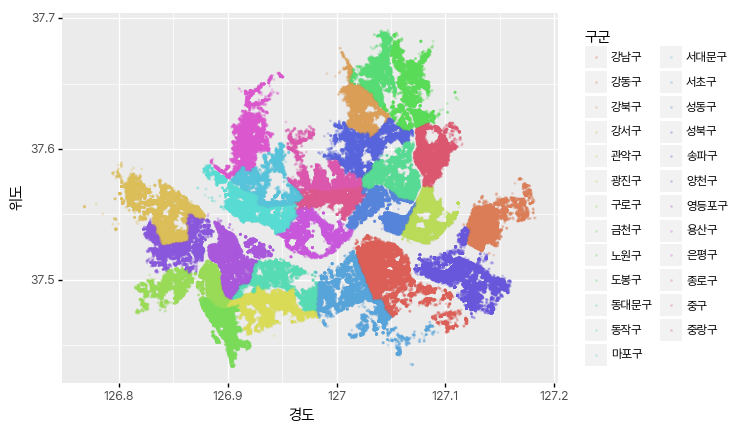

<ggplot: (-9223371836155906293)>

In [26]:
(
    ggplot(shop_seoul, aes(x='경도', y='위도', color='구군'))
        + geom_point(size=0.2, alpha=0.2)
        + theme(text=element_text(family='Pretendard'))
)

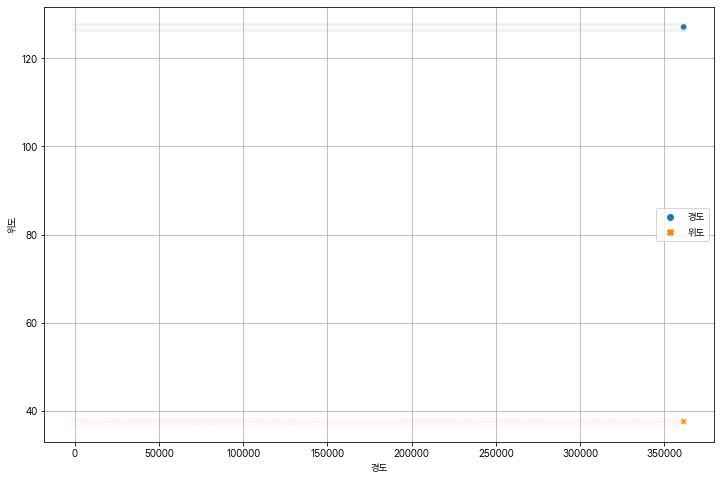

In [27]:
shop_seoul.plot.scatter(x='경도', y='위도', grid=True, figsize=(12, 8), s=1)
sns.scatterplot(data=shop_seoul)
plt.show()

In [28]:
set(shop_seoul.상권업종대분류명)

{'관광/여가/오락', '부동산', '생활서비스', '소매', '숙박', '스포츠', '음식', '학문/교육'}

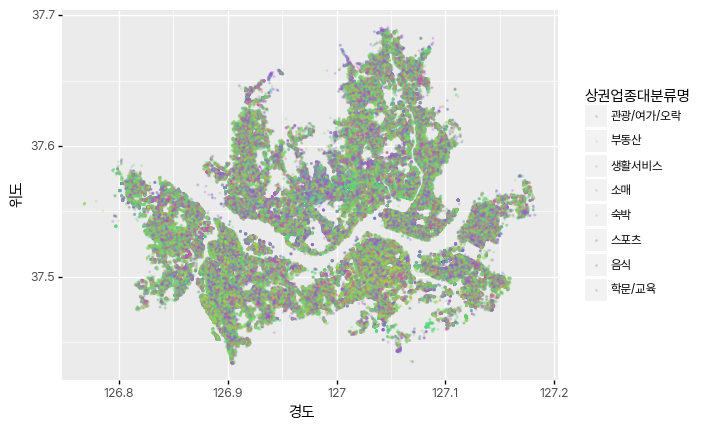

<ggplot: (200726494177)>

In [29]:
(
    ggplot(shop_seoul, aes(x='경도', y='위도', color='상권업종대분류명'))
        + geom_point(size=0.2, alpha=0.2)
        + theme(text=element_text(family='Pretendard'))
        + scale_fill_gradient(low='blue', high='green')
)

학문/교육과 관련된 정보 보기

In [30]:
shop_seoul_edu = shop_seoul[shop_seoul.상권업종대분류명 == '학문/교육']

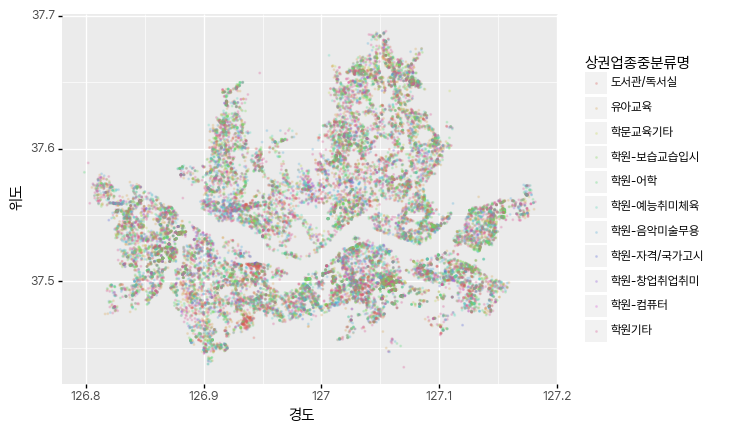

<ggplot: (200709750199)>

In [31]:
(
    ggplot(shop_seoul_edu, aes(x='경도', y='위도', color='상권업종중분류명'))
        + geom_point(size=0.2, alpha=0.2)
        + theme(text=element_text(family='Pretendard'))
        + scale_fill_gradient(low='purple', high='yellow')
)

부동산에 관련된 정보 보기

In [32]:
shop_seoul_realty = shop_seoul[shop_seoul.상권업종대분류명 == '부동산']

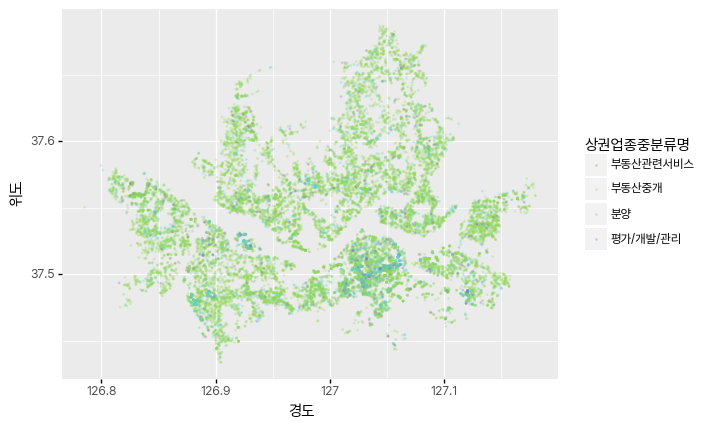

<ggplot: (200741898707)>

In [33]:
(
    ggplot(shop_seoul_realty, aes(x='경도', y='위도', color='상권업종중분류명'))
        + geom_point(size=0.2, alpha=0.2)
        + theme(text=element_text(family='Pretendard'))
        + scale_fill_gradient(low='purple', high='yellow')
)

In [34]:
shop_seoul_edu_computer = shop_seoul[shop_seoul.상권업종중분류명 == '학원-컴퓨터']
data = shop_seoul_edu_computer

In [35]:
# 컴퓨터 학원 위치 시각화
import folium

In [36]:
edu_map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12)

# for _, edu in data.iterrows():
#     popup = folium.Popup('{}: {}'.format(edu['상호명'], edu['도로명주소']), max_width=300)
#     folium.Marker(location=[edu['위도'], edu['경도']], popup=popup).add_to(edu_map)

for i in data.index:
    popup = folium.Popup('{}: {}'.format(data.loc[i, '상호명'], data.loc[i, '도로명주소']), max_width=150)
    folium.Marker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup).add_to(edu_map)

edu_map

In [37]:
shop_seoul_cafe = shop_seoul[shop_seoul.상권업종중분류명 == '커피점/카페']
shop_seoul_cafe

상호명          지점명 상권업종대분류명 상권업종중분류명    시도명  시군구명   행정동명   법정동명  \
20            커피빈  코리아대학로대명거리점       음식   커피점/카페  서울특별시   종로구    혜화동   명륜4가   
97          요거프레소          쌍문점       음식   커피점/카페  서울특별시   도봉구   쌍문2동    쌍문동   
188         우성커피숍          NaN       음식   커피점/카페  서울특별시   양천구   신월4동    신월동   
195          버블베어          NaN       음식   커피점/카페  서울특별시   강서구   방화3동    방화동   
230           알뤼르          NaN       음식   커피점/카페  서울특별시   강남구   대치4동    대치동   
...           ...          ...      ...      ...    ...   ...    ...    ...   
361388  공유KYOUYUU          2호점       음식   커피점/카페  서울특별시   성동구    용답동    용답동   
361389       운비차실          NaN       음식   커피점/카페  서울특별시    중구    회현동  회현동1가   
361462         풀꽃          NaN       음식   커피점/카페  서울특별시   강동구   암사3동    암사동   
361472        댄싱컵         가재울점       음식   커피점/카페  서울특별시  서대문구  남가좌2동   남가좌동   
361480       플랫카페          NaN       음식   커피점/카페  서울특별시   광진구   구의1동    구의동   

                        지번주소                                 도로명주소  \
20         서울특별시 종로구 명륜4가 51              서울특별시 종로구 대명길 25, (명륜4가)   
97          서울특별시 도봉구 쌍문동 20         서울특별시 도봉구 도당로 7, (쌍문동, 벽산프라자)   
188      서울특별시 양천구 신월동 514-2               서울특별시 양천구 오목로 48, (신월동)   
195        서울특별시 강서구 방화동 819         서울특별시 강서구 금낭화로 167, (방화동, 개화)   
230        서울특별시 강남구 대치동 894  서울특별시 강남구 삼성로85길 33, (대치동, 현대썬앤빌테헤란)   
...                      ...                                   ...   
361388   서울특별시 성동구 용답동 45-14             서울특별시 성동구 용답25길 22, (용답동)   
361389  서울특별시 중구 회현동1가 172-4            서울특별시 중구 퇴계로6길 17, (회현동1가)   
361462  서울특별시 강동구 암사동 441-10  서울특별시 강동구 고덕로 47, 101동  (암사동, 정산아파트)   
361472   서울특별시 서대문구 남가좌동 390  서울특별시 서대문구 거북골로 100, (남가좌동, 래미안루센티아)   
361480   서울특별시 광진구 구의동 635-2            서울특별시 광진구 자양로23길 73, (구의동)   

                경도         위도     시도    구군  
20      127.000171  37.583149  서울특별시   종로구  
97      127.034746  37.658728  서울특별시   도봉구  
188     126.842935  37.522055  서울특별시   양천구  
195     126.813358  37.580941  서울특별시   강서구  
230     127.054731  37.504378  서울특별시   강남구  
...            ...        ...    ...   ...  
361388  127.052731  37.562363  서울특별시   성동구  
361389  126.978534  37.557465  서울특별시    중구  
361462  127.130397  37.555004  서울특별시   강동구  
361472  126.918228  37.575633  서울특별시  서대문구  
361480  127.083681  37.543595  서울특별시   광진구  

[20842 rows x 14 columns]

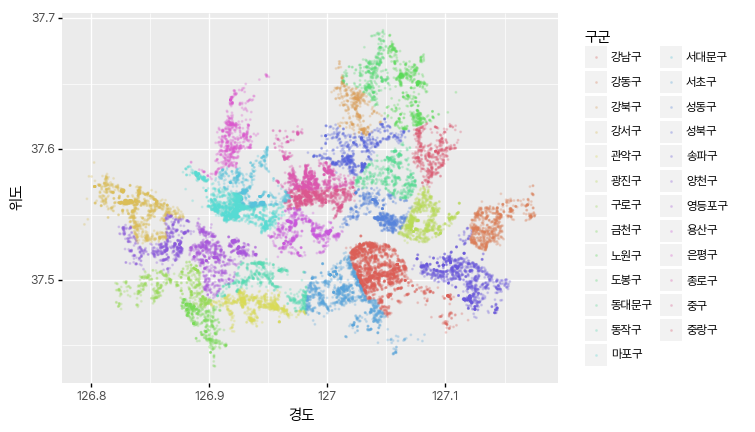

<ggplot: (200749229253)>

In [38]:
(
    ggplot(shop_seoul_cafe, aes(x='경도', y='위도', color='구군'))
        + geom_point(size=0.2, alpha=0.2)
        + theme(text=element_text(family='Pretendard'))
        + scale_fill_gradient(low='purple', high='yellow')
)

In [39]:
data = shop_seoul_cafe[shop_seoul_cafe['구군'] == '종로구']
cafe_map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12)

for i in data.index:
    popup = folium.Popup('{}: {}'.format(data.loc[i, '상호명'], data.loc[i, '도로명주소']), max_width=150)
    folium.Marker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup).add_to(cafe_map)

cafe_map

In [41]:
data = shop_seoul_cafe[shop_seoul_cafe['상호명'].str.find('이디야') >= 0]
cafe_map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12)

for i in data.index:
    popup = folium.Popup('{}: {}'.format(data.loc[i, '상호명'], data.loc[i, '도로명주소']), max_width=150)
    folium.CircleMarker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup, icon=folium.Icon(color='red')).add_to(cafe_map)

data = shop_seoul_cafe[shop_seoul_cafe['상호명'].str.find('스타벅스') >= 0]
for i in data.index:
    popup = folium.Popup('{}: {}'.format(data.loc[i, '상호명'], data.loc[i, '도로명주소']), max_width=150)
    folium.CircleMarker(location=[data.loc[i, '위도'], data.loc[i, '경도']], popup=popup, icon=folium.Icon(color='green')).add_to(cafe_map)


cafe_map

In [55]:
shop_seoul_cafe_count = shop_seoul_cafe.groupby('구군').상호명.count()
shop_seoul_cafe_count

구군
강남구     2191
강동구      764
강북구      384
강서구     1134
관악구      720
광진구      837
구로구      585
금천구      489
노원구      606
도봉구      389
동대문구     565
동작구      590
마포구     1637
서대문구     705
서초구     1205
성동구      694
성북구      731
송파구     1243
양천구      601
영등포구     969
용산구      726
은평구      609
종로구     1056
중구       901
중랑구      511
Name: 상호명, dtype: int64

In [56]:
shop_seoul_cafe_lat = shop_seoul_cafe.groupby('구군').위도.mean()
shop_seoul_cafe_lat.head()

구군
강남구    37.506213
강동구    37.542173
강북구    37.632598
강서구    37.555692
관악구    37.480556
Name: 위도, dtype: float64

In [57]:
shop_seoul_cafe_lot = shop_seoul_cafe.groupby('구군').경도.mean()
shop_seoul_cafe_lot.head()

구군
강남구    127.044623
강동구    127.139304
강북구    127.023288
강서구    126.837914
관악구    126.939697
Name: 경도, dtype: float64

In [44]:
shop_seoul_cafe.groupby('구군').상호명.count()
shop_seoul_cafe

상호명          지점명 상권업종대분류명 상권업종중분류명    시도명  시군구명   행정동명   법정동명  \
20            커피빈  코리아대학로대명거리점       음식   커피점/카페  서울특별시   종로구    혜화동   명륜4가   
97          요거프레소          쌍문점       음식   커피점/카페  서울특별시   도봉구   쌍문2동    쌍문동   
188         우성커피숍          NaN       음식   커피점/카페  서울특별시   양천구   신월4동    신월동   
195          버블베어          NaN       음식   커피점/카페  서울특별시   강서구   방화3동    방화동   
230           알뤼르          NaN       음식   커피점/카페  서울특별시   강남구   대치4동    대치동   
...           ...          ...      ...      ...    ...   ...    ...    ...   
361388  공유KYOUYUU          2호점       음식   커피점/카페  서울특별시   성동구    용답동    용답동   
361389       운비차실          NaN       음식   커피점/카페  서울특별시    중구    회현동  회현동1가   
361462         풀꽃          NaN       음식   커피점/카페  서울특별시   강동구   암사3동    암사동   
361472        댄싱컵         가재울점       음식   커피점/카페  서울특별시  서대문구  남가좌2동   남가좌동   
361480       플랫카페          NaN       음식   커피점/카페  서울특별시   광진구   구의1동    구의동   

                        지번주소                                 도로명주소  \
20         서울특별시 종로구 명륜4가 51              서울특별시 종로구 대명길 25, (명륜4가)   
97          서울특별시 도봉구 쌍문동 20         서울특별시 도봉구 도당로 7, (쌍문동, 벽산프라자)   
188      서울특별시 양천구 신월동 514-2               서울특별시 양천구 오목로 48, (신월동)   
195        서울특별시 강서구 방화동 819         서울특별시 강서구 금낭화로 167, (방화동, 개화)   
230        서울특별시 강남구 대치동 894  서울특별시 강남구 삼성로85길 33, (대치동, 현대썬앤빌테헤란)   
...                      ...                                   ...   
361388   서울특별시 성동구 용답동 45-14             서울특별시 성동구 용답25길 22, (용답동)   
361389  서울특별시 중구 회현동1가 172-4            서울특별시 중구 퇴계로6길 17, (회현동1가)   
361462  서울특별시 강동구 암사동 441-10  서울특별시 강동구 고덕로 47, 101동  (암사동, 정산아파트)   
361472   서울특별시 서대문구 남가좌동 390  서울특별시 서대문구 거북골로 100, (남가좌동, 래미안루센티아)   
361480   서울특별시 광진구 구의동 635-2            서울특별시 광진구 자양로23길 73, (구의동)   

                경도         위도     시도    구군  
20      127.000171  37.583149  서울특별시   종로구  
97      127.034746  37.658728  서울특별시   도봉구  
188     126.842935  37.522055  서울특별시   양천구  
195     126.813358  37.580941  서울특별시   강서구  
230     127.054731  37.504378  서울특별시   강남구  
...            ...        ...    ...   ...  
361388  127.052731  37.562363  서울특별시   성동구  
361389  126.978534  37.557465  서울특별시    중구  
361462  127.130397  37.555004  서울특별시   강동구  
361472  126.918228  37.575633  서울특별시  서대문구  
361480  127.083681  37.543595  서울특별시   광진구  

[20842 rows x 14 columns]

In [60]:
shop_seoul_cafe_concat = pd.concat([shop_seoul_cafe_count, shop_seoul_cafe_lat, shop_seoul_cafe_lot], axis=1)
shop_seoul_cafe_concat.head()

상호명         위도          경도
구군                              
강남구  2191  37.506213  127.044623
강동구   764  37.542173  127.139304
강북구   384  37.632598  127.023288
강서구  1134  37.555692  126.837914
관악구   720  37.480556  126.939697

In [68]:
data = shop_seoul_cafe_concat
cafe_map = folium.Map(location=[data['위도'].mean(), data['경도'].mean()], zoom_start=12)

for index, edu in data.iterrows():
    popup = folium.Popup('{}: {:,.0f}개'.format(index, edu['상호명']), max_width=300)
    folium.CircleMarker(location=[edu['위도'], edu['경도']], popup=popup, radius=edu['상호명']/50).add_to(cafe_map)

cafe_map